# **Assignment: Detect Hand Guestures**


# Requirement:  
* Build a Computer Vision Application to Detect Hand Gestures.
* Focus is on 3 Gestures. Rock, Paper, Scissor


# INSTRUCTIONS:
* Make your own copy of the Notebook before starting the assignment.
  **File** -> **save a copy in Drive**

* Fill the place holders in the notebook which are indicated with the 'FILL:' Key word.

## Download & Extract Rock-Paper-Scissor Datasets

Link to the dataset: https://www.tensorflow.org/datasets/catalog/rock_paper_scissors



In [1]:
!mkdir ./tmp

Train Dataset

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/download.tensorflow.org/data/rps.zip \
    -O ./tmp/rps.zip


--2024-07-13 11:31:01--  https://storage.googleapis.com/download.tensorflow.org/data/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.207, 142.250.145.207, 74.125.128.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘./tmp/rps.zip’

./tmp/rps.zip       100%[===================>] 191.38M  29.8MB/s    in 7.5s    

2024-07-13 11:31:09 (25.4 MB/s) - ‘./tmp/rps.zip’ saved [200682221/200682221]



Validation Dataset

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/download.tensorflow.org/data/rps-test-set.zip \
    -O ./tmp/rps-test-set.zip

--2024-07-13 11:31:09--  https://storage.googleapis.com/download.tensorflow.org/data/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.207, 142.250.145.207, 74.125.128.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘./tmp/rps-test-set.zip’

./tmp/rps-test-set. 100%[===================>]  28.15M  21.2MB/s    in 1.3s    

2024-07-13 11:31:11 (21.2 MB/s) - ‘./tmp/rps-test-set.zip’ saved [29516758/29516758]



## Use Zipfile to extract the files

In [4]:
import zipfile
import os

In [5]:
def extract_file(src, dest):
  # opening the zip file in READ mode
  with zipfile.ZipFile(src, 'r') as zip:
      # extracting all the files
      print(f'Extracting all the files from {src}...')
      zip.extractall(dest)
      print('Done!')

In [6]:
extract_file(src='./tmp/rps.zip', dest='./data')
extract_file(src='./tmp/rps-test-set.zip', dest='./data')

Extracting all the files from ./tmp/rps.zip...
Done!
Extracting all the files from ./tmp/rps-test-set.zip...
Done!


In [7]:
def get_image_counts(parent_folder, dataset_name):
  rock_dir = os.path.join(parent_folder, 'rock')
  paper_dir = os.path.join(parent_folder, 'paper')
  scissors_dir = os.path.join(parent_folder, 'scissors')

  print(f'total {dataset_name} rock images: {len(os.listdir(rock_dir))}')
  print(f'total {dataset_name} paper images: {len(os.listdir(paper_dir))}')
  print(f'total {dataset_name} scissors images: {len(os.listdir(scissors_dir))}')

In [8]:
get_image_counts(parent_folder='./data/rps', dataset_name='training')

total training rock images: 840
total training paper images: 840
total training scissors images: 840


In [9]:
get_image_counts(parent_folder='./data/rps-test-set', dataset_name='testing')

total testing rock images: 124
total testing paper images: 124
total testing scissors images: 124


# Training Pipeline Implementation

## Import Required Libraries

In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

### 2.1. Visualize Data

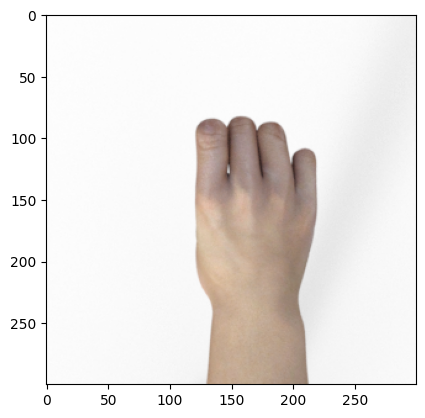

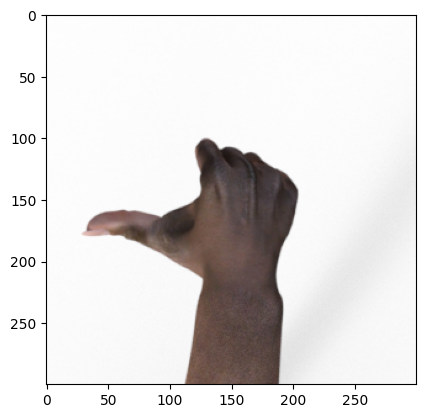

(300, 300, 3)


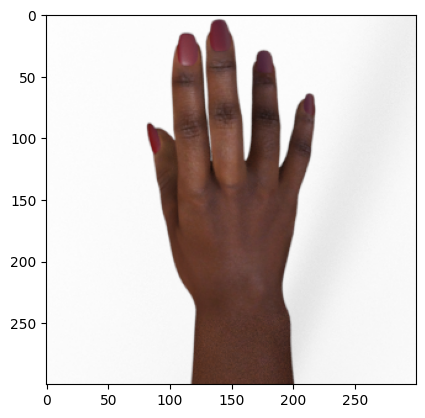

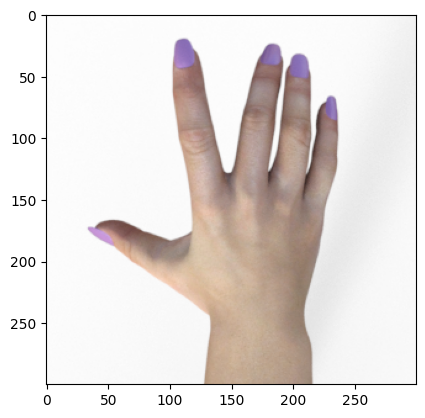

(300, 300, 3)


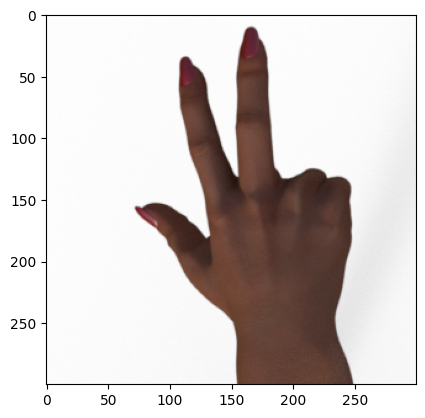

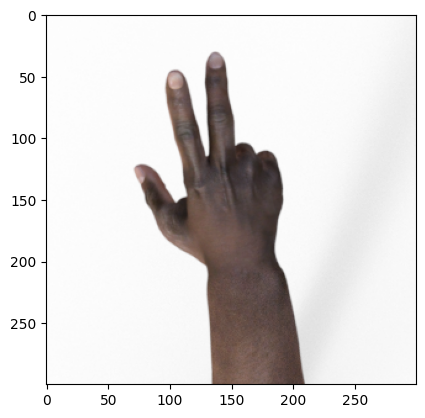

(300, 300, 3)


In [11]:
for label in ['rock', 'paper', 'scissors']:
  im_folder = f'./data/rps/{label}'
  im_count = 2
  for im_name in  os.listdir(im_folder)[:im_count]:
      im_path = os.path.join(im_folder, im_name)
      img = Image.open(im_path).convert('RGB')
      img = np.asarray(img)
      # plt.title(f'Label: { y_test[i]}')
      plt.imshow(img)
      plt.show()
  print(img.shape)

# Use Image Data Generator to Pre-process and to Feed data to the training pipeline

## Requirement:
### 1.Resize Images to (128, 128)
### 2.Rescale images to (0 - 1.) range
### 3. Use batch_size: 64
### 4.Augment only the training data.
### 5. Augmentations to be used,
        rotation_range=40
        width_shift_range=0.2
        height_shift_range=0.2
        shear_range=0.2
        zoom_range=0.2
        horizontal_flip=True
        fill_mode='nearest'
    

In [12]:
from keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "./data/rps/"
training_datagen = ImageDataGenerator(
    # FILL: Create the training_datagen ImageDataGenerator, according to the above mentioned requirements.
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "./data/rps-test-set/"
validation_datagen = ImageDataGenerator(
      # FILL: Create the validation_datagen ImageDataGenerator, according to the above mentioned requirements.
      rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    # FILL: Create the train_generator to flow the ImageDataGenerator images from TRAINING_DIR directory, according to the above mentioned requirements.
    TRAINING_DIR,
  	target_size=(128, 128),
  	class_mode='categorical',
    batch_size=64
)

validation_generator = validation_datagen.flow_from_directory(
    # FILL: Create the train_generator to flow the ImageDataGenerator images from VALIDATION_DIR directory, according to the above mentioned requirements.
    VALIDATION_DIR,
	  target_size=(128, 128),
	  class_mode='categorical',
    batch_size=64
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


## Create a model according to the below configuration.
### Need to have 4 convolutional blocks. Use **ReLU** activation for all convolution layers.
  first convolution block:

    Kernal Shape= (3,3)
    Number of Filters 64
  
  second convolution block:

    Kernal Shape= (3,3)
    Number of Filters 64

  third convolution block:

    Kernal Shape= (3,3)
    Number of Filters 128

  fourth convolution block:

    Kernal Shape= (3,3)
    Number of Filters 128

### Need to have 2 Dense Layers. Use **ReLU** activation for the first Dense layer. Use a suitable activation function for the Dense final layer.

  first dense layer:

    Number of Nodes= 512
    Activation Function: ReLU
    
    Note: It is advisable to use dropout with a suitable drop probability for the flattened input; just before feeding into the first dense layer.

  second (final) dense layer:

    Number of Nodes: Decide based on the Task
    Activation Function: Decide based on the Task

In [13]:
model = tf.keras.models.Sequential([
    # FILL: Complete the CNN model based on the above mentioned requirements.
    # This is the first convolution block
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # The second convolution block
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # The third convolution block
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # The fourth convolution block
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),

    # Add a Dropout with a suitable probability
    tf.keras.layers.Dropout(0.5),

    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),

    # Output layer with Softmax activation.
    tf.keras.layers.Dense(3, activation='softmax')

])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

## Class names order

In [14]:
class_names = sorted(os.listdir('/content/data/rps'))
class_names

['paper', 'rock', 'scissors']

## Define a suitable preprocessing function to,
1. resize the given image to the expected input size.
2. Normalize images from [0, 255] to [0, 1] range.
3. Make sure to expand the first dimension before feeding the image to the NN


In [15]:
def im_preprocess(img_path, display=False):
  # FILL: im_preprocess function.
  img = Image.open(img_path).convert('RGB')  # (300, 300, 3)

  newsize = (128, 128)
  img = img.resize(newsize)

  img = np.asarray(img)
  img = img/255.


  if display:
    plt.imshow(img)
    plt.show()

  img = np.expand_dims(img, axis=0) # (1, 128, 128, 3)

  return img


## Predict before training.

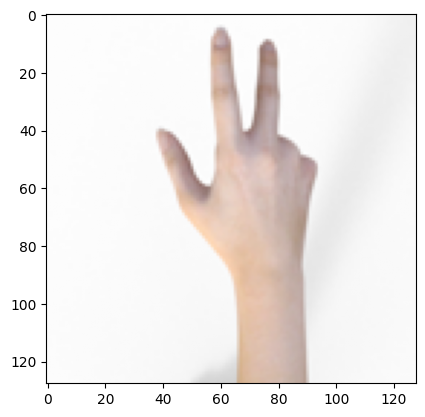

In [16]:
im_path = './data/rps/scissors/scissors01-004.png'
img = im_preprocess(img_path=im_path, display=True)

In [17]:
pred_b4_training = model.predict(img)
print(pred_b4_training)
print('\n Prediction before Training:', np.argmax(pred_b4_training))

1/1 [==============================] - 2s 2s/step
[[0.3476227 0.3374471 0.3149302]]

 Prediction before Training: 0


## Train the model.

### Define tensorboard_callback

In [18]:
# Use tensorboard_callback for training.
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")

In [19]:
# FILL: compile model with a suitable Loss Function. Use Adam Optimizer with learning_rate=1e-3
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
             loss = 'categorical_crossentropy', metrics=[keras.metrics.CategoricalAccuracy()])

In [20]:
# FILL: Feed the train_generator to train the model for 25 epochs,
# Use validation data to validate the model
# Use tensorboard_callback for training.
hist = model.fit(train_generator, epochs = 25, validation_data = validation_generator, callbacks=[tensorboard_callback])

Epoch 1/25
40/40 [==============================] - 28s 558ms/step - loss: 1.1079 - categorical_accuracy: 0.3345 - val_loss: 1.0900 - val_categorical_accuracy: 0.3602
Epoch 2/25
40/40 [==============================] - 20s 509ms/step - loss: 1.0144 - categorical_accuracy: 0.4845 - val_loss: 0.5678 - val_categorical_accuracy: 0.6989
Epoch 3/25
40/40 [==============================] - 19s 473ms/step - loss: 0.6823 - categorical_accuracy: 0.6980 - val_loss: 0.3780 - val_categorical_accuracy: 0.8280
Epoch 4/25
40/40 [==============================] - 20s 511ms/step - loss: 0.4826 - categorical_accuracy: 0.8052 - val_loss: 0.1063 - val_categorical_accuracy: 0.9677
Epoch 5/25
40/40 [==============================] - 19s 466ms/step - loss: 0.2875 - categorical_accuracy: 0.8845 - val_loss: 0.1016 - val_categorical_accuracy: 0.9651
Epoch 6/25
40/40 [==============================] - 20s 500ms/step - loss: 0.2248 - categorical_accuracy: 0.9167 - val_loss: 0.0506 - val_categorical_accuracy: 0.983

## Evaluate trained Model

In [21]:
# FILL: Evaluate the model on the test data using `evaluate`. Expected Result: 95+%  Accuracy.
print("Evaluate on test data")
results = model.evaluate(validation_generator, batch_size=64)
print("test loss, test acc:", results)

Evaluate on test data
6/6 [==============================] - 1s 186ms/step - loss: 0.1053 - categorical_accuracy: 0.9651
test loss, test acc: [0.10530288517475128, 0.9650537371635437]


### Save Trained Model

In [22]:
model.save("rps_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Load Trained Model

In [23]:
trained_model = keras.models.load_model('rps_model.h5')

## Run Inference after training

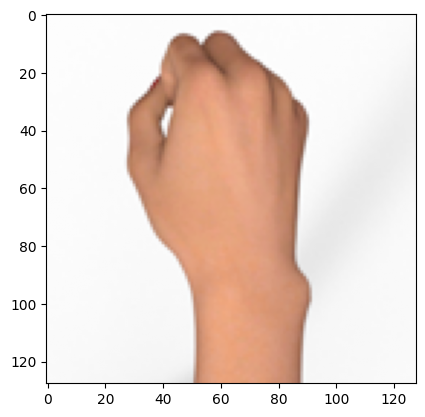

In [24]:
im_path = '/content/data/rps-test-set/rock/testrock01-05.png'
img = im_preprocess(img_path=im_path, display=True)

In [25]:
pred_after_training = trained_model.predict(img)
print(pred_after_training)
print('\n Prediction after Training:', class_names[np.argmax(pred_after_training)])

1/1 [==============================] - 0s 80ms/step
[[5.0408204e-07 9.9999952e-01 2.6201594e-08]]

 Prediction after Training: rock


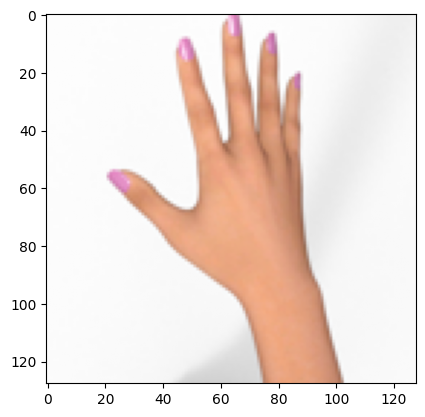

1/1 [==============================] - 0s 17ms/step
[[9.9986410e-01 7.0431309e-07 1.3513833e-04]]

 Prediction after Training: paper


In [26]:
im_path = '/content/data/rps-test-set/paper/testpaper01-07.png'
img = im_preprocess(img_path=im_path, display=True)

pred_after_training = trained_model.predict(img)
print(pred_after_training)
print('\n Prediction after Training:', class_names[np.argmax(pred_after_training)])

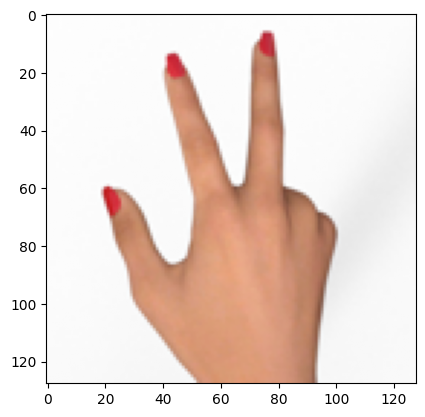

1/1 [==============================] - 0s 17ms/step
[[3.9834231e-06 1.7458764e-07 9.9999583e-01]]

 Prediction after Training: scissors


In [27]:
im_path = '/content/data/rps-test-set/scissors/testscissors01-10.png'
img = im_preprocess(img_path=im_path, display=True)

pred_after_training = trained_model.predict(img)
print(pred_after_training)
print('\n Prediction after Training:', class_names[np.argmax(pred_after_training)])

## Visualize training with tensorboard.

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
%tensorboard --logdir './logs'